## Transfer Learning VGG19 using Keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:


vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/MyDrive/Pictures/tomato/train'
valid_path = '/content/gdrive/MyDrive/Pictures/tomato/val'


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/gdrive/MyDrive/Pictures/tomato/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

<ipython-input-16-1593f5338362>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/30
313/313 [==============================] - 152s 485ms/step - loss: 0.1729 - accuracy: 0.9488 - val_loss: 0.9119 - val_accuracy: 0.8300
Epoch 2/30
313/313 [==============================] - 151s 482ms/step - loss: 0.0975 - accuracy: 0.9676 - val_loss: 0.7050 - val_accuracy: 0.8450
Epoch 3/30
313/313 [==============================] - 152s 484ms/step - loss: 0.1062 - accuracy: 0.9654 - val_loss: 0.6312 - val_accuracy: 0.8680
Epoch 4/30
313/313 [==============================] - 151s 482ms/step - loss: 0.1080 - accuracy: 0.9635 - val_loss: 0.9327 - val_accuracy: 0.8250
Epoch 5/30
313/313 [==============================] - 153s 490ms/step - loss: 0.1410 - accuracy: 0.9531 - val_loss: 0.8856 - val_accuracy: 0.8350
Epoch 6/30
313/313 [==============================] - 151s 481ms/step - loss: 0.1125 - accuracy: 0.9615 - val_loss: 0.6834 - val_accuracy: 0.8660
Epoch 7/30
313/313 [==============================] - 152s 484ms/step - loss: 0.1038 - accuracy: 0.9663 - val_loss: 0.6503 -

In [ ]:
import matplotlib.pyplot as plt

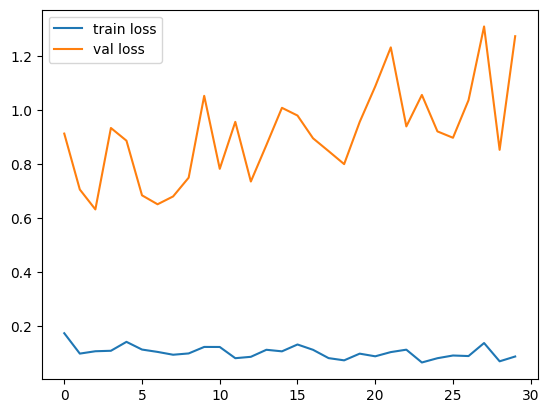

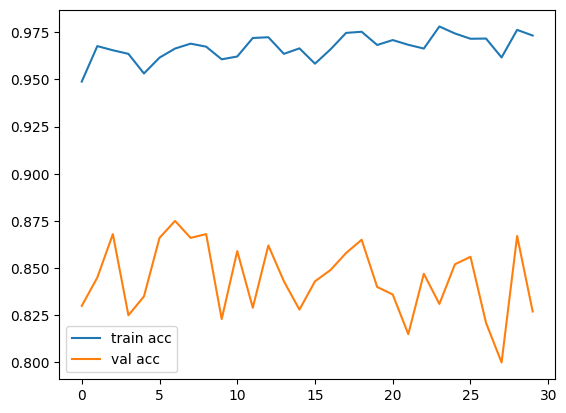

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_vgg19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_vgg19')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('vgg19_model.h5')

In [ ]:

y_pred = model.predict(valid_set)


32/32 [==============================] - 5s 154ms/step


In [ ]:
scores=model.evaluate(valid_set)

32/32 [==============================] - 5s 147ms/step - loss: 1.2724 - accuracy: 0.8270


In [ ]:
scores

[1.2724149227142334, 0.8270000219345093]

In [ ]:
y_pred

array([[3.30595813e-27, 5.95784815e-13, 1.65767787e-14, ...,
        1.01823020e-24, 7.67639008e-11, 9.99981284e-01],
       [1.73602669e-12, 6.70752967e-11, 9.78246477e-12, ...,
        1.68832299e-21, 1.09977895e-20, 1.32728620e-11],
       [2.63506127e-11, 7.10469487e-12, 9.01340100e-05, ...,
        9.99902606e-01, 5.94918673e-15, 7.62154787e-18],
       ...,
       [1.89632455e-26, 2.34524662e-22, 3.94462280e-21, ...,
        5.32860278e-28, 1.00000000e+00, 3.23149022e-37],
       [1.35543495e-02, 2.31180444e-01, 7.55265176e-01, ...,
        2.44751070e-16, 2.06229695e-27, 6.14457870e-22],
       [5.39234162e-20, 3.38246785e-14, 1.10420819e-08, ...,
        1.35852918e-18, 9.73218212e-19, 6.42135972e-24]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([9, 4, 7, 1, 4, 5, 2, 4, 9, 0, 8, 5, 3, 3, 4, 1, 9, 3, 5, 6, 3, 9,
       0, 4, 3, 1, 5, 2, 0, 1, 5, 5, 3, 2, 4, 4, 6, 2, 6, 6, 0, 5, 2, 2,
       4, 3, 0, 7, 7, 1, 4, 8, 2, 6, 5, 6, 5, 5, 5, 5, 9, 4, 9, 4, 5, 7,
       1, 9, 7, 8, 0, 5, 4, 3, 8, 2, 0, 2, 8, 3, 4, 5, 3, 1, 0, 5, 8, 7,
       2, 9, 8, 1, 5, 6, 0, 1, 5, 5, 2, 2, 6, 3, 0, 3, 5, 7, 2, 4, 2, 6,
       3, 0, 2, 9, 5, 4, 5, 4, 5, 1, 5, 8, 7, 7, 5, 2, 3, 6, 5, 2, 7, 5,
       6, 5, 2, 2, 3, 2, 2, 0, 3, 2, 7, 5, 7, 5, 5, 1, 5, 5, 9, 0, 6, 8,
       4, 2, 0, 0, 7, 5, 3, 5, 9, 5, 3, 4, 0, 7, 8, 4, 0, 5, 7, 0, 3, 9,
       4, 1, 3, 4, 7, 4, 3, 2, 3, 5, 8, 6, 2, 4, 3, 6, 3, 2, 3, 9, 5, 4,
       8, 9, 3, 5, 2, 2, 2, 3, 9, 3, 3, 8, 7, 5, 7, 1, 4, 2, 9, 3, 9, 5,
       2, 2, 7, 0, 9, 0, 9, 8, 8, 2, 7, 5, 3, 9, 6, 9, 3, 3, 5, 3, 5, 4,
       0, 3, 2, 2, 4, 4, 3, 9, 8, 0, 2, 2, 3, 5, 6, 3, 5, 4, 0, 9, 2, 8,
       2, 7, 5, 2, 1, 7, 9, 5, 8, 6, 5, 4, 1, 6, 6, 7, 7, 4, 3, 0, 0, 4,
       8, 7, 5, 7, 4, 6, 0, 0, 7, 0, 2, 5, 5, 2, 5,

In [ ]:
class_names = list(training_set.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

1/1 [==============================] - 0s 20ms/step


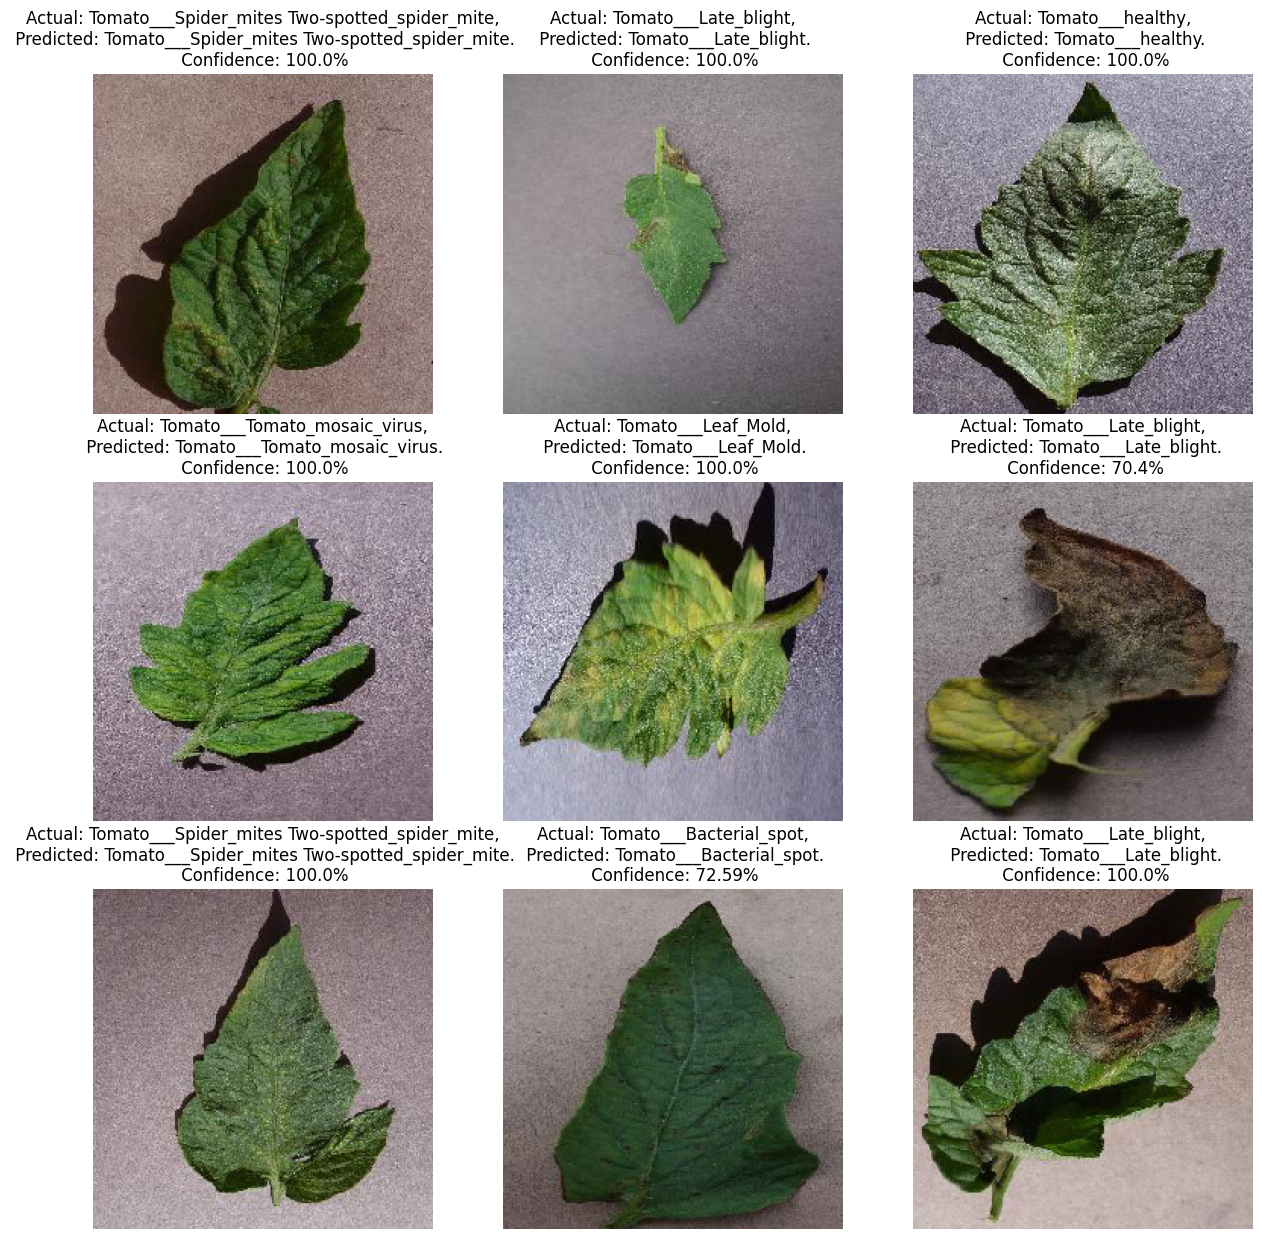

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in valid_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[returnIndex(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break